<h2> Classicifaction of Iris Flowers Through Machine Learning</h2>

<img width = 400 height = 400 src = "Iris.png"/>

In [128]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load Dataset 

In [130]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [131]:
df.target.unique()
iris.target_names
#print(iris.DESCR) 
#print(iris.keys)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Data Description 

In [133]:
df.isnull().sum()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Data Visualization 

In [135]:
df['target_names'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


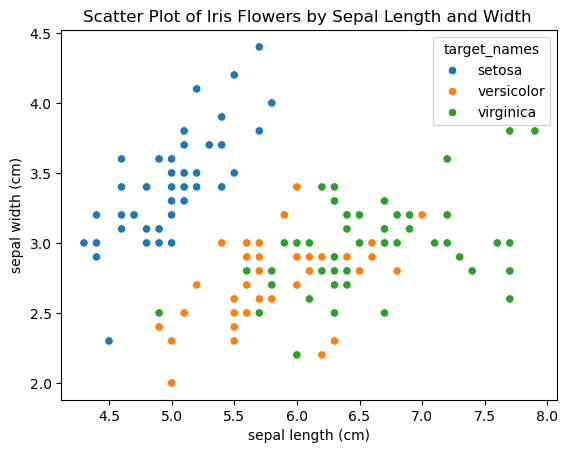

In [136]:
sns.scatterplot(df, x= 'sepal length (cm)', y = 'sepal width (cm)',hue = 'target_names')
plt.title("Scatter Plot of Iris Flowers by Sepal Length and Width ")
plt.show()

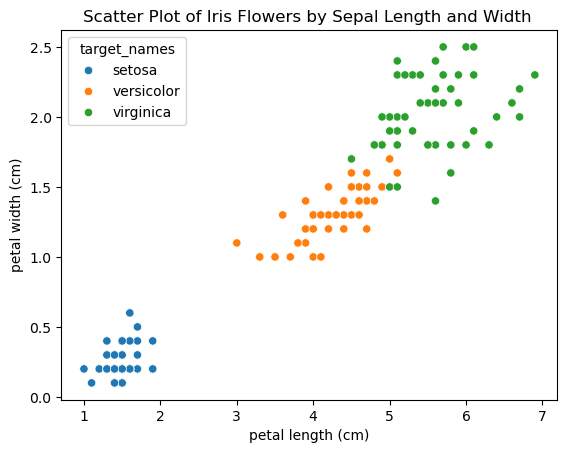

In [137]:
sns.scatterplot(df, x= 'petal length (cm)', y = 'petal width (cm)',hue = 'target_names')
plt.title("Scatter Plot of Iris Flowers by Sepal Length and Width ")
plt.show()

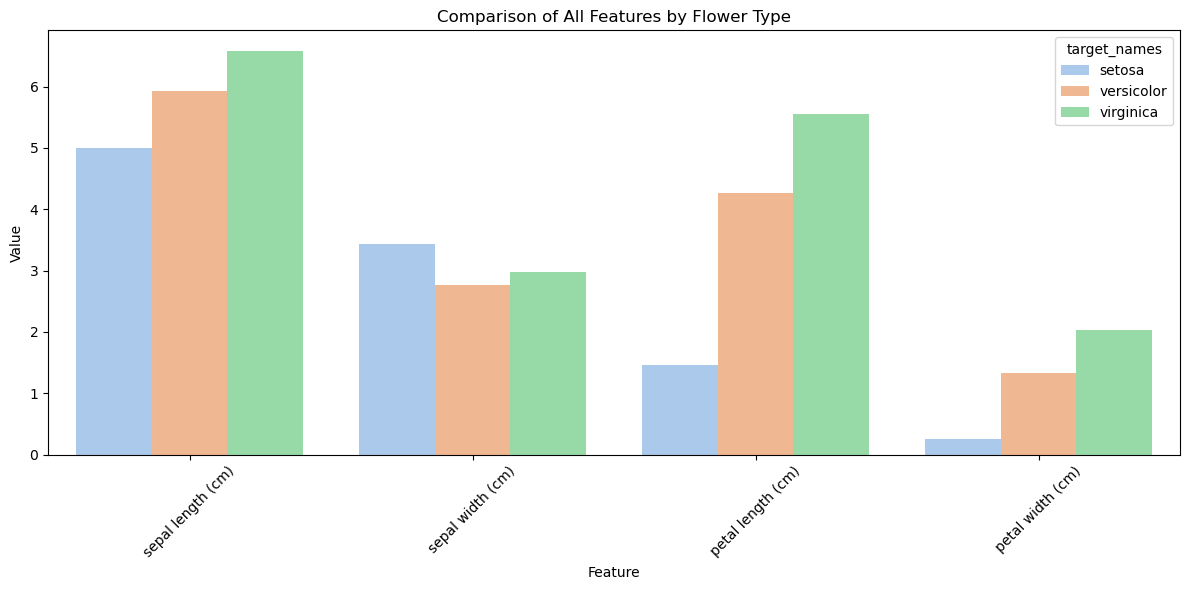

In [138]:
plt.figure(figsize=(12, 6))
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df_melted = df.melt(id_vars='target_names', value_vars=features, var_name='Feature', value_name='Value')
sns.barplot(x='Feature', y='Value', hue='target_names', data=df_melted, errorbar=None, palette ='pastel')
plt.title('Comparison of All Features by Flower Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [139]:
X=df[['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)']]
y = df['target']

### Model Training 

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate (pass both X_test and y_test to score)
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [142]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [143]:
y_pred[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [144]:
y_test[:10].tolist()

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1]

### Model Evaluation 

In [146]:
from sklearn.metrics import classification_report 
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Model Evaluation Visualization 

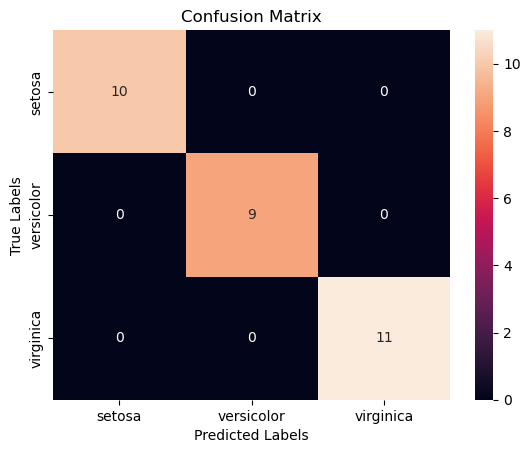

In [153]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, 
            xticklabels=iris.target_names,  
            yticklabels=iris.target_names, 
            annot=True, 
            fmt='d')  

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()